### Pre Process the Data

In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from langdetect import detect, detect_langs
import googletrans
from googletrans import Translator
import re
import translate
from tensorflow.keras.preprocessing.text import Tokenizer
#from googletranslate import Translator
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 

C:\ProgramData\Anaconda3\envs\gpu_test\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\gpu_test\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\gpu_test\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\gpu_test\lib\site-packages\tensorf

In [2]:
import socket    
hostname = socket.gethostname()    
IPAddr = socket.gethostbyname(hostname)    
print("Your Computer Name is:" + hostname)    
print("Your Computer IP Address is:" + IPAddr) 

Your Computer Name is:Prasad-Dell-LT
Your Computer IP Address is:192.168.1.7


#### Use when running through google collab
from google.colab import drive
drive.mount('/drive', force_remount=True)

project_path = "/drive/My Drive/AIML_Project_Files_Final/10.Capstone Project"

In [3]:
# Please note that this Dataset has 4 more extra columns to identify the language and transilate to English
# Tried this transilation in Python using googletrans API but there is limitation on the numbers of calls, hence 
# googl sheets was used 
df = pd.read_excel("input_data_translated.xlsx", encoding="utf-8",dtype="str")

In [4]:
df.dtypes

Short description    object
Description          object
short_desc_lang      object
short_desc_en        object
description_lang     object
description_en       object
Caller               object
Assignment group     object
dtype: object

In [5]:
df.describe()

,Short description,Description,short_desc_lang,short_desc_en,description_lang,description_en,Caller,Assignment group
count,8492,8499,8492,8492,8497,8497,8500,8500
unique,7481,7817,50,7379,36,7752,2950,74
top,password reset,the,en,password reset,en,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,7613,48,7768,56,810,3976


In [6]:
# Load original dataset gven in the project 
df1 = pd.read_excel("input_data.xlsx")
df1.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [7]:
#Remove Junk charaters from the text.. below is an example
"ç­”å¤: ticket_no1559458 : wireless guest access- hr_tool trainer".encode('ascii','ignore').decode()

': ticket_no1559458 : wireless guest access- hr_tool trainer'

In [8]:
# We are going to use the DataFrame df for further processing 
df.describe()

,Short description,Description,short_desc_lang,short_desc_en,description_lang,description_en,Caller,Assignment group
count,8492,8499,8492,8492,8497,8497,8500,8500
unique,7481,7817,50,7379,36,7752,2950,74
top,password reset,the,en,password reset,en,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,7613,48,7768,56,810,3976


In [9]:
# There is Email ID in the Description field . we need to saperate this and store in another column 
#RegEx to find email form the text .. an example below
emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", df["Description"][2])
print(emails)
my_str = "Hi my name is John and email address is john.doe@somecompany.co.uk and my friend's email is jane_doe124@gmail.com"
emails = re.findall("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)", my_str)
print(emails)


['eylqgodm.ybqkwiam@gmail.com']
['john.doe@somecompany.co.uk', 'jane_doe124@gmail.com']


In [10]:
#RegEx to remove spaces from the text.. an example below
t1 = '       Hello  World       From Pankaj \t\n\r\t \t /**  Hi There             '
print('Remove all spaces using RegEx:\n', re.sub(r"\s+", " ", df["Description"][2]), sep='')  # \s matches all white spaces

a = ' '.join([item for item in df["Description"][342].split() if '@' not in item])
b = re.sub(r"received from:","",a)

print(df["Short description"][223])
print (a,"  ",b)
#print(df["Description"][223])


Remove all spaces using RegEx:
 received from: eylqgodm.ybqkwiam@gmail.com hi i cannot log on to vpn best 
probleme mit bluescreen .
shortcut opening multiple folders    shortcut opening multiple folders


In [11]:
df.head(5)

,Short description,Description,short_desc_lang,short_desc_en,description_lang,description_en,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,en,login issue,en,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,en,outlook,en,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,en,cant log in to vpn,en,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,en,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,en,skype error,en,skype error,owlgqjme qhcozdfx,GRP_0


In [12]:
#Find and impute Null values from Short description 
df[pd.isnull(df["Short description"]) == True].index

Int64Index([2604, 3383, 3906, 3910, 3915, 3921, 3924, 4341], dtype='int64')

In [13]:
#Impute Null values of short description with the column 'Description'
for i in df[pd.isnull(df["Short description"]) == True].index :
  df["Short description"][i] = df["Description"][i]
  df["short_desc_lang"][i] = df["description_lang"][i]
  df["short_desc_en"][i] = df["description_en"][i]

In [14]:
# Find Null values in the field "Description"
df[pd.isnull(df["Description"]) == True].index

Int64Index([4395], dtype='int64')

In [15]:
# Impute Null values with "Short Description "
for i in df[pd.isnull(df["Description"]) == True].index :
  df["Description"][i] = df["Short description"][i]
  df["description_lang"][i] = df["short_desc_lang"][i]
  df["description_en"][i] = df["short_desc_en"][i]

In [16]:
for i in df[pd.isnull(df["description_lang"]) == True].index :
  df["Description"][i] = df["Short description"][i]
  df["description_lang"][i] = df["short_desc_lang"][i]
  df["description_en"][i] = df["short_desc_en"][i]

In [17]:
df.count()

Short description    8500
Description          8500
short_desc_lang      8500
short_desc_en        8500
description_lang     8500
description_en       8500
Caller               8500
Assignment group     8500
dtype: int64

In [18]:
#df["short_desc_lang"] = ""
#df["short_desc_en"] = ""
#df["description_lang"]=""
#df["description_en"] = ""
df["emails"] = ""
df["email_type"]=""
df["short_desc_spl"] = ""
df["description_spl"] = ""
df["short_desc_len"] = ""
df["description_len"] = ""
df["no_of_splch_removed1"]=""
df["no_of_splch_removed1_pct"]=""
df["no_of_splch_removed2"]=""
df["no_of_splch_removed2_pct"]=""
df["short_desc_en_spl"] = ""
df["description_en_spl"] = ""
df["short_desc_en_len"] = ""
df["description_en_len"] = ""
df["trimmed_words"] = ""
df["trimmed_words_len"] = ""
df["mark_for_delete"]=""

x = 0

for i in range(len(df)):  
  short_desc = str(df["Short description"][i]).encode('ascii','ignore').decode()
  df.loc[i,"no_of_splch_removed1"] = len(df["Short description"][i]) - len(str(df["Short description"][i]).encode('ascii','ignore').decode())
  df.loc[i,"no_of_splch_removed1_pct"] = np.round((df.loc[i,"no_of_splch_removed1"]*100 / len(df["Short description"][i])),1)
  desc = str(df["Description"][i]).encode('ascii','ignore').decode()
  df.loc[i,"no_of_splch_removed2"] = len(df["Description"][i]) - len(str(df["Description"][i]).encode('ascii','ignore').decode())
  df.loc[i,"no_of_splch_removed2_pct"] = np.round((df.loc[i,"no_of_splch_removed2"]*100 / len(df["Description"][i])),1)
    
  # The below Funtion is to transilate the sentances to English but this free API has miliation. Hence not used. 
  # We used the pre transilated input data (using Googl sheet)
  #if b == "en" :
  #      trn = Translator().translate(short_desc, dest = "en", src = "auto")
  #      short_desc_en = trn.text 
  #      trn1 = Translator().translate(desc, dest = "en", src = "auto")
  #      Description_en = trn1.text
  #else :
  
  #The below function is to remove Junk Characters from text 
  short_desc_en = str(df["short_desc_en"][i]).encode('ascii','ignore').decode()
  Description_en =str(df["description_en"][i]).encode('ascii','ignore').decode()
  
  # Finding the first Email Address from the 'Description' column. 
  if(len(re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", df["Description"][i]))) > 0:
      df.loc[i,"emails"] = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", df["Description"][i])[0]
    #df["emails"][i] = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", df["Description"][i])
  
  #Removing the Email ID from the short description ------------------------------------
  fltr_txt = ' '.join([item for item in short_desc.split() if '@' not in item])
  fltr_txt = re.sub(r"received from:","",fltr_txt)
  alpha = ""
  for char in fltr_txt:
    if char.isspace():
      alpha+= " "
    if char.isalnum():
      alpha+= char.lower()
  df.loc[i,"short_desc_spl"] = str(" ".join(alpha.split()))
  df.loc[i,"short_desc_len"] = len(alpha.split()) 
  #df.loc[i,"no_splch_removed"] = len(fltr_txt)-len(alpha.split())  
  #Removing the Email ID from the Description-------------------------------------------------
  fltr_txt1 = ' '.join([item for item in desc.split() if '@' not in item])
  fltr_txt1 = re.sub(r"received from:","",fltr_txt1)
  alpha1 = ""
  for char in fltr_txt1:
    if char.isspace():
      alpha1+= " "
    if char.isalnum():
      alpha1+= char.lower()
  df.loc[i,"description_spl"] = str(" ".join(alpha1.split()))
  df.loc[i,"description_len"] = len(alpha1.split())  
  #----------------------------   
  fltr_txt = ' '.join([item for item in short_desc_en.split() if '@' not in item])
  fltr_txt = re.sub(r"received from:","",fltr_txt)
  alpha = ""
  for char in fltr_txt:
    if char.isspace():
      alpha+= " "
    if char.isalnum():
      alpha+= char.lower()
  df.loc[i,"short_desc_en_spl"] = str(" ".join(alpha.split()))
  df.loc[i,"short_desc_en_len"] = len(alpha.split()) 
  #---------------------------------
  fltr_txt1 = ' '.join([item for item in Description_en.split() if '@' not in item])
  fltr_txt1 = re.sub(r"received from:","",fltr_txt1)
  alpha1 = ""
  for char in fltr_txt1:
    if char.isspace():
      alpha1+= " "
    if char.isalnum():
      alpha1+= char.lower()
  df.loc[i,"description_en_spl"] = str(" ".join(alpha1.split())) 
  df.loc[i,"description_en_len"] = len(alpha1.split())
  
  #--------------------------------------  
  # Final Text after stop word removal and combining both short and long description
  if df["short_desc_en_spl"][i] == df["description_en_spl"][i] : 
    df.loc[i,"trimmed_words"] = " ".join([item for item in df["short_desc_en_spl"][i].split() if item not in stop_words])
  else :
    df.loc[i,"trimmed_words"] = " ".join([item for item in df["short_desc_en_spl"][i].split() if item not in stop_words])+" "+" ".join([item for item in df["description_en_spl"][i].split() if item not in stop_words])
  #Mark records with lot of junk characters for  delete -----------------------------------------------
  df.loc[i,"trimmed_words_len"] = len(df["trimmed_words"][i].split())
  if df["trimmed_words_len"][i] <= 1:
    df.loc[i,"mark_for_delete"]= 1
  if df["no_of_splch_removed1_pct"][i]>50: # sentances with more than 50% junk
    df.loc[i,"mark_for_delete"]= 1
  #Progress Bar-----------------------------------------------------------------------------------------------------------
  if np.mod(i,1000) == 0:
    #print("\n")
    print(np.round((i*100/len(df))),"% ", end = "")
  if np.mod(i,100) == 0:
    print("=", end = "")
  

0.0 % ==========12.0 % ==========24.0 % ==========35.0 % ==========47.0 % ==========59.0 % ==========71.0 % ==========82.0 % ==========94.0 % =====

In [19]:
df["trimmed_words"][10]

'engineering tool says connected unable submit reports'

In [20]:
#Word Tokenizer
numword = 2000
t = Tokenizer(num_words=numword)
t.fit_on_texts((df["short_desc_en_spl"]))
t1 = Tokenizer(num_words=numword)
t1.fit_on_texts((df["description_en_spl"]))


In [21]:
#build a word Corpus
short_desc_words = pd.DataFrame()
short_desc_words["word_index"] = ""
short_desc_words["word"] = ""
short_desc_words["word_count"] = ""

desc_words = pd.DataFrame()
desc_words["word_index"] = ""
desc_words["word"] = ""
desc_words["word_count"] = ""


i = 0
for word in t.word_index:
    if not word in stop_words:
        if i<= 1500 :
            new_row = {'word_index':t.word_index[word], 'word':word, 'word_count':t.word_counts[word]}
            short_desc_words = short_desc_words.append(new_row, ignore_index=True)
            i = i+1

        
i = 0
for word in t1.word_index:
    if not word in stop_words:
        if i<= 1500 :
            new_row = {'word_index':t1.word_index[word], 'word':word, 'word_count':t1.word_counts[word]}
            desc_words = desc_words.append(new_row, ignore_index=True)
            i = i+1


In [22]:
short_desc_words

,word_index,word,word_count
0,5,job,978
1,7,jobscheduler,959
2,9,password,889
3,10,erp,854
4,11,failed,829
...,...,...,...
1496,1603,plug,3
1497,1604,previous,3
1498,1605,dns,3
1499,1606,hardcopy,3


In [23]:
desc_words

,word_index,word,word_count
0,9,please,2074
1,14,yesnona,1568
2,17,password,1205
3,20,user,1161
4,21,erp,1145
...,...,...,...
1496,1613,second,13
1497,1614,ph,13
1498,1615,sometimes,13
1499,1616,across,13


In [24]:
short_desc_words.to_csv("short_desc_words.csv")
desc_words.to_csv("desc_words.csv")

In [25]:
t.texts_to_sequences('job has'.split())

[[5], [88]]

In [26]:
t.word_index['job']

5

In [27]:
df["flg_account_related"]=0
df["flg_crm"]=0
df["flg_engineering"]=0
df["flg_erp"]=0
df["flg_failed"]=0
df["flg_help"]=0
df["flg_install"]=0
df["flg_job"]=0
df["flg_laptop"]=0
df["flg_mobile"]=0
df["flg_network"]=0
df["flg_outlook"]=0
df["flg_printer"]=0
df["flg_skype"]=0
df["flg_ticket_update"]=0
df["flg_vpn"]=0
df["flg_windows"]=0
df["host_related"]=0
df["mobile"]=0
df["blank_call"]=0
df["setup_ws"]=0

In [28]:

for i in range(len(df)):
#---------------------------------------------------------------------
    if df["emails"][i].find("gmail") >= 0:
        df.loc[i,"email_type"] = "gmail"
    else: 
        if df["emails"][i].find("monitoring_tool@") >=0:
            df.loc[i,"email_type"] = "monitoring_tool"
        else:
            if df["emails"][i].find("company") >=0:
                df.loc[i,"email_type"] = "company"
            else :
                df.loc[i,"email_type"] = "others"
    
    if df["trimmed_words"][i].find("access") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("account") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("locked") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("login") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("logon") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("password") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("passwordmanagementtool") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("passwords") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("reset") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("tologin") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("unlock") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("user") >= 0 :
        df.loc[i,"flg_account_related"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("circuit") >= 0 :
        df.loc[i,"flg_network"] = 1
    if df["trimmed_words"][i].find("connection") >= 0 :
        df.loc[i,"flg_network"] = 1
    if df["trimmed_words"][i].find("network") >= 0 :
        df.loc[i,"flg_network"] = 1
    if df["trimmed_words"][i].find("outage") >= 0 :
        df.loc[i,"flg_network"] = 1
    if df["trimmed_words"][i].find("server") >= 0 :
        df.loc[i,"flg_network"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("vpn") >= 0 :
        df.loc[i,"flg_vpn"] = 1
    if df["trimmed_words"][i].find("vpncompanycom") >= 0 :
        df.loc[i,"flg_vpn"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("computer") >= 0 :
        df.loc[i,"flg_laptop"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("crm") >= 0 :
        df.loc[i,"flg_crm"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("email") >= 0 :
        df.loc[i,"flg_outlook"] = 1
    if df["trimmed_words"][i].find("emails") >= 0 :
        df.loc[i,"flg_outlook"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("outlook") >= 0 :
        df.loc[i,"flg_outlook"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("error") >= 0 :
        df.loc[i,"flg_failed"] = 1
    if df["trimmed_words"][i].find("failed") >= 0 :
        df.loc[i,"flg_failed"] = 1
    if df["trimmed_words"][i].find("issue") >= 0 :
        df.loc[i,"flg_failed"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("engineering") >= 0 :
        df.loc[i,"flg_engineering"] = 1
    if df["trimmed_words"][i].find("engineeringtool") >= 0 :
        df.loc[i,"flg_engineering"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("erp") >= 0 :
        df.loc[i,"flg_erp"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("help") >= 0 :
        df.loc[i,"flg_help"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("install") >= 0 :
        df.loc[i,"flg_install"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("job") >= 0 :
        df.loc[i,"flg_job"] = 1
    if df["trimmed_words"][i].find("jobscheduler") >= 0 :
        df.loc[i,"flg_job"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("laptop") >= 0 :
        df.loc[i,"flg_laptop"] = 1
    if df["trimmed_words"][i].find("pc") >= 0 :
        df.loc[i,"flg_laptop"] = 1    
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("phone") >= 0 :
        df.loc[i,"flg_mobile"] = 1
    if df["trimmed_words"][i].find("telephonysoftware") >= 0 :
        df.loc[i,"flg_mobile"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("print") >= 0 :
        df.loc[i,"flg_printer"] = 1
    if df["trimmed_words"][i].find("printer") >= 0 :
        df.loc[i,"flg_printer"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("skype") >= 0 :
        df.loc[i,"flg_skype"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("problems") >= 0 :
        df.loc[i,"flg_failed"] = 1
    if df["trimmed_words"][i].find("unable") >= 0 :
        df.loc[i,"flg_failed"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("ticket") >= 0 :
        df.loc[i,"flg_ticket_update"] = 1
    if df["trimmed_words"][i].find("update") >= 0 :
        df.loc[i,"flg_ticket_update"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("windows") >= 0 :
        df.loc[i,"flg_windows"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("hostname") >= 0 :
        df.loc[i,"host_related"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("mobile") >= 0 :
        df.loc[i,"mobile"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("blank call") >= 0 :
        df.loc[i,"blank_call"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("setup new ws") >= 0 :
        df.loc[i,"setup_ws"] = 1
#---------------------------------------------------------------------    
    if np.mod(i,1000) == 0:
     #print("\n")
      print(np.round((i*100/len(df))),"% ", end = "")
    if np.mod(i,100) == 0:
      print("=", end = "")
  

0.0 % ==========12.0 % ==========24.0 % ==========35.0 % ==========47.0 % ==========59.0 % ==========71.0 % ==========82.0 % ==========94.0 % =====

In [29]:
df.dtypes

Short description           object
Description                 object
short_desc_lang             object
short_desc_en               object
description_lang            object
description_en              object
Caller                      object
Assignment group            object
emails                      object
email_type                  object
short_desc_spl              object
description_spl             object
short_desc_len              object
description_len             object
no_of_splch_removed1        object
no_of_splch_removed1_pct    object
no_of_splch_removed2        object
no_of_splch_removed2_pct    object
short_desc_en_spl           object
description_en_spl          object
short_desc_en_len           object
description_en_len          object
trimmed_words               object
trimmed_words_len           object
mark_for_delete             object
flg_account_related          int64
flg_crm                      int64
flg_engineering              int64
flg_erp             

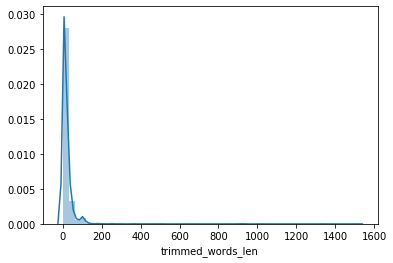

In [30]:
sns.distplot(df["trimmed_words_len"])

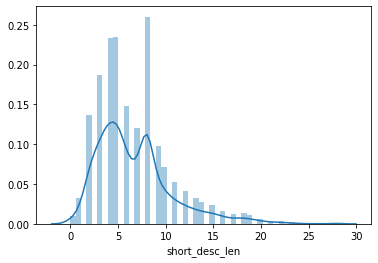

In [31]:
sns.distplot(df["short_desc_len"])

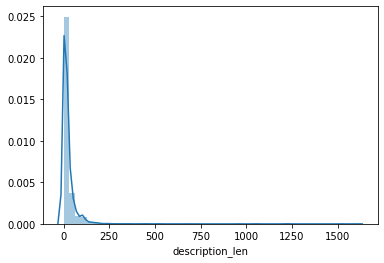

In [32]:
sns.distplot(df["description_len"])

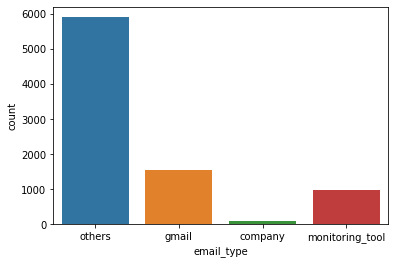

In [33]:
sns.countplot(df["email_type"])

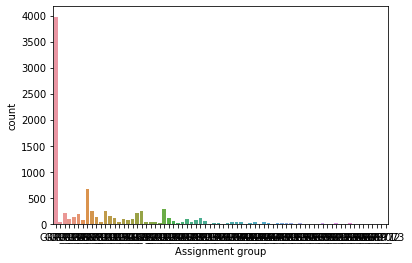

In [34]:
sns.countplot(df["Assignment group"])

In [35]:
a = df.groupby("Assignment group")
a["Assignment group"].count().sort_values(ascending = False)

Assignment group
GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_61       1
GRP_73       1
GRP_35       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64

In [36]:
b = df.groupby("Short description")
print(b["Short description"].count().sort_values(ascending = False).head(10))

Short description
password reset               38
windows password reset       29
account locked in ad         24
windows account locked       23
erp SID_34 account unlock    19
login issue                  18
blank call                   18
account locked.              18
unable to connect to vpn     18
account unlock               17
Name: Short description, dtype: int64


In [37]:
b = df.groupby("Caller")
print(b["Caller"].count().sort_values(ascending = False).head(10))

Caller
bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
jloygrwh acvztedi     64
spxqmiry zpwgoqju     63
oldrctiu bxurpsyi     57
olckhmvx pcqobjnd     54
dkmcfreg anwmfvlg     51
Name: Caller, dtype: int64


In [38]:
df[df["mark_for_delete"]==1][["Short description","Description","trimmed_words","description_en_len","description_en_spl","trimmed_words_len","no_of_splch_removed1"]]

,Short description,Description,trimmed_words,description_en_len,description_en_spl,trimmed_words_len,no_of_splch_removed1
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...,"from: \nsent: friday, october 28, 2016 7:20 a...",shipment notification sent friday october 28 2...,27,from sent friday october 28 2016 720 am to nwf...,24,30
276,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,outlook c folder folderoffice,4,outlook c folder folderoffice,4,48
469,ieæµè§ˆå™¨æ‰“å¼€crmç³»ç»ŸåŽæç¤ºç”¨æˆ·å·²è¢...,ieæµè§ˆå™¨æ‰“å¼€crmç³»ç»ŸåŽæç¤ºç”¨æˆ·å·²è¢...,ie crm zae crm ya,6,ie crm there zae crm ya,5,72
487,msd - office 2013 outlook æ‰“ä¸å¼€ï¼Œæ˜¾ç¤ºæ—...,please provide details of the issue.\n[â€Ž2016...,msd office 2013 outlook cs please provide deta...,38,please provide details of the issue 2016 z10 z...,37,54
618,outlookæ‰“ä¸å¼€,æ‰“å¼€outlookæ—¶ï¼Œæ˜¾ç¤ºoutlook.ostæ–‡ä»¶é”™è...,outlook outlookoutlookost,2,outlookoutlookost is,2,9
...,...,...,...,...,...,...,...
8266,erpæ— æ³•è¿›è¡Œé‡‡è´­ï¼ˆè½¬ç»™è´ºæ­£å¹³ï¼‰,"è¿›è¡Œé‡‡è´­æ—¶æ˜¾ç¤º""æ‰¾ä¸åˆ°å‘˜å·¥111115483...",erp 1111154833 scy c,4,1111154833 is scy c,4,39
8270,å¯†ç æ›´æ”¹åŽï¼Œoutlookæ— æ³•ç™»é™†,å¯†ç æ›´æ”¹åŽï¼Œoutlookæ— æ³•ç™»é™†,outlook,3,the outlook is,1,30
8457,æ— æ³•ç™»é™†hr_toolè€ƒå‹¤ç³»ç»Ÿ,æ˜¾ç¤ºjavaæ’ä»¶æ— æ³•åŠ è½½ï¼Œæ‰€éœ€ç‰ˆæœ¬1.8...,hrtool java pushkin 18045,5,java as pushkin 18045 is,4,24
8465,vpn è¿žæŽ¥ä¸ä¸Š,vpnè¿žä¸ä¸Šï¼Œè¯·è½¬ç»™ è´ºæ­£å¹³ atcbvglq.bd...,vpn vpn,1,vpn,2,12


In [39]:
df.to_excel("processed_data.xlsx")

## Summary of Columns : 

* Input file was loaded into a DataFrame. 
* It was observed that there are some records whcih are not in English. Tried to use googletran/ Transilator package in Python. However, they have limitation for no of free calls. Hence, loaded the data into google sheets and transilated
* In order to proces the data several new columns were created to undersatnd the no of special characters..etc
* Using tokenizer, word corpus was built with Max 1500 words. 
* Both short and long description was combined after removing special characters/ transilation to english/ applying Tokenizer
* Records where more than 50% characters are junk are marked for delete
* below is the list of new columns created


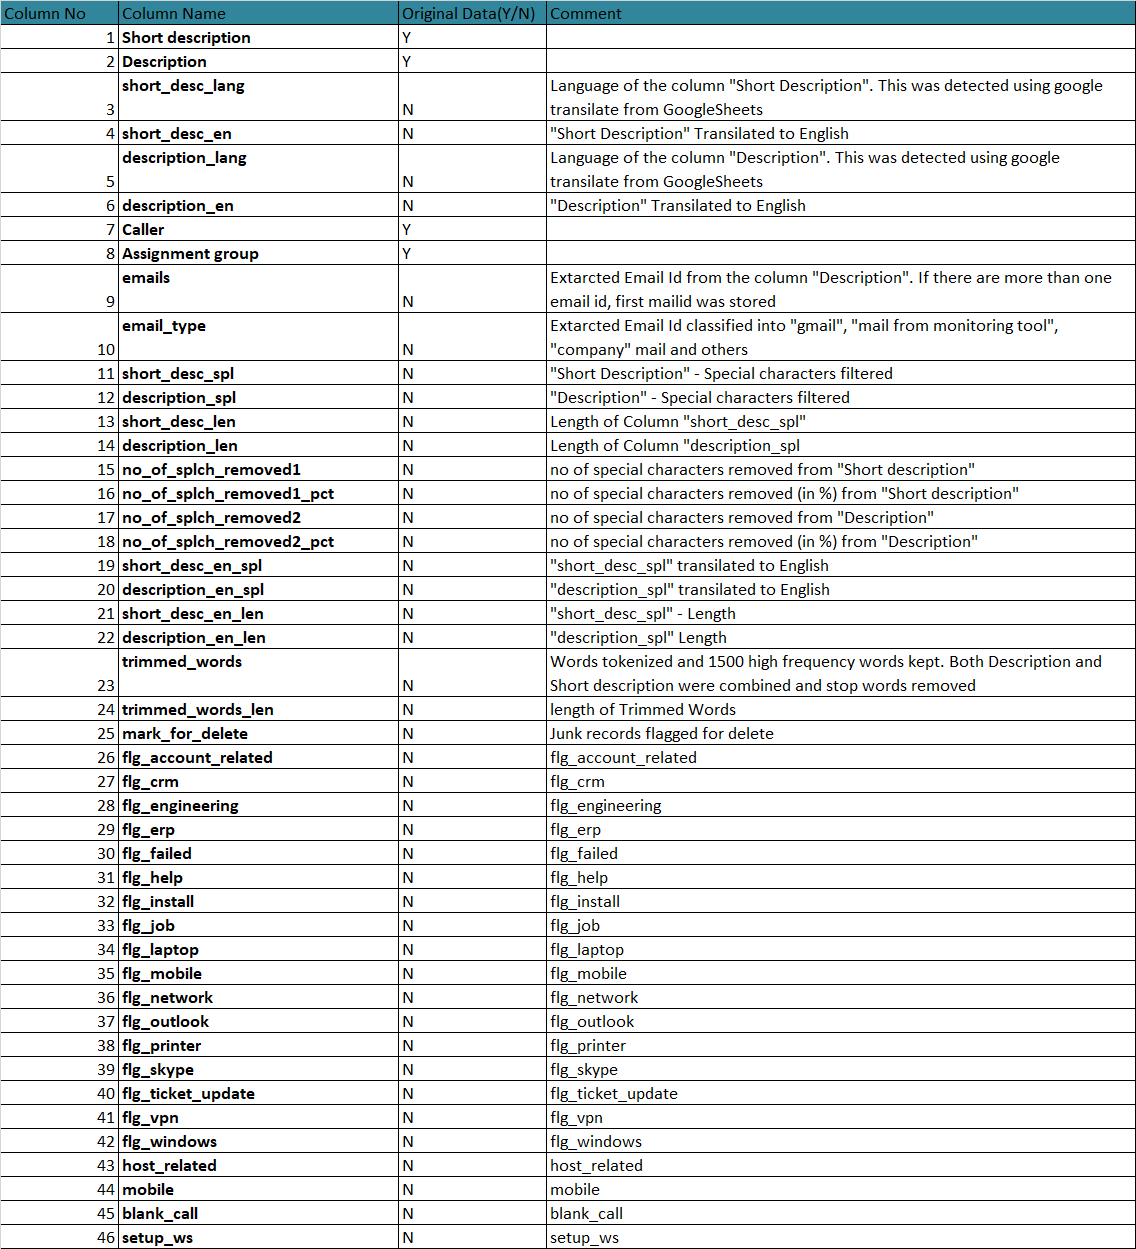


### Further processing 

Groups which ahve less than 30 tickets should be combined as one group as we can not really make sence of them


In [ ]:
df["marked_for_delete"]

In [45]:

a = df.groupby("Assignment group")
a = pd.DataFrame(a["Assignment group"].count().sort_values(ascending = False))
new_group = list(a[a["Assignment group"]>=30]["Assignment group"].index)
print(new_group)

['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19', 'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25', 'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_17', 'GRP_31', 'GRP_7', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30', 'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11']


In [47]:
df["new_group"] = ""

for i in range(len(df)):
    if df["Assignment group"][i] in new_group:
        df.loc[i,"new_group"] = df["Assignment group"][i]
    else :
        df.loc[i,"new_group"] = "GRP_9999"

In [48]:
a = df.groupby("new_group")
a = pd.DataFrame(a["new_group"].count().sort_values(ascending = False))
print(a)

           new_group
new_group           
GRP_0           3976
GRP_8            661
GRP_9999         357
GRP_24           289
GRP_12           257
GRP_9            252
GRP_2            241
GRP_19           215
GRP_3            200
GRP_6            184
GRP_13           145
GRP_10           140
GRP_5            129
GRP_14           118
GRP_25           116
GRP_33           107
GRP_4            100
GRP_29            97
GRP_18            88
GRP_16            85
GRP_17            81
GRP_31            69
GRP_7             68
GRP_34            62
GRP_26            56
GRP_40            45
GRP_28            44
GRP_41            40
GRP_30            39
GRP_15            39
GRP_42            37
GRP_20            36
GRP_45            35
GRP_22            31
GRP_1             31
GRP_11            30


In [53]:
len(df[df["trimmed_words_len"]>700]["trimmed_words"])

14

In [54]:
X = df["trimmed_words"]
y = df["Assignment group"]

Using TensorFlow backend.


Review length: 
Mean 150.92 words (387.715128)


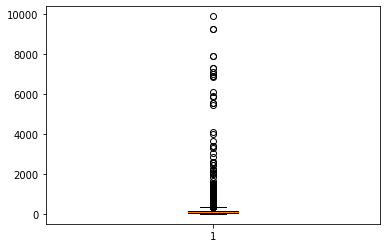

In [55]:
import numpy
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences

%matplotlib inline
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [58]:
" ".join(X[0].split()[:20])

'login issue verified user detailsemployee manager name checked user name ad reset password advised user login check caller confirmed able'

In [ ]:
#X = df["short_desc_en"]
#y = df["Assignment group"]

Review length: 
Mean 150.92 words (387.715128)


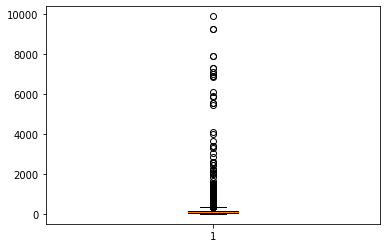

In [59]:
import numpy
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences

%matplotlib inline
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [63]:
X1 = t.texts_to_sequences(X)

In [68]:
X2 = pad_sequences(X1, maxlen=200, padding = 'post', truncating = 'post') 
#X_test =  pad_sequences(X_test, maxlen=100, padding = 'post', truncating = 'post')

In [69]:
X2.shape

(8500, 200)

In [70]:
X2[0]

array([ 21,  17,  30, 128, 255,  30, 255, 124,  15,   9,  30,  21, 137,
       872, 823,  72,  21,  17, 835,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
values = np.array(df["new_group"])

In [73]:
df["new_group"].shape

(8500,)

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

In [75]:
label_encoder.classes_

array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_22', 'GRP_24', 'GRP_25', 'GRP_26', 'GRP_28',
       'GRP_29', 'GRP_3', 'GRP_30', 'GRP_31', 'GRP_33', 'GRP_34', 'GRP_4',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_45', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_9999'], dtype=object)

In [76]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [79]:
onehot_encoded.shape

(8500, 36)

In [80]:
y = onehot_encoded

In [81]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [82]:
#Import all the required Libraries

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
import collections
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, Add
from tensorflow.keras.models import Model, Sequential

%matplotlib inline

In [83]:
#Split the dataset into Train and test
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.2, random_state = 10, shuffle = True)
X_train.shape,y_train.shape, y_train[10], X_test.shape, y_test.shape

((6800, 200),
 (6800, 36),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 (1700, 200),
 (1700, 36))

In [84]:
batch_size = 100
epochs = 25

In [85]:
X2[0]

array([ 21,  17,  30, 128, 255,  30, 255, 124,  15,   9,  30,  21, 137,
       872, 823,  72,  21,  17, 835,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [123]:
embedding_size = 200
maxlen = 200

# Crete a Sequential Model
model1 = Sequential()

# Add embedding as the first layer. We are going to initiate with the pre trained Glove vector. Since they are already trained embeddings
# We are going to make the trainable parameter 'false'
model1.add(Embedding(t.num_words, embedding_size, input_length = maxlen, trainable = True, name='L1_Embedding'))

#These embeddings are made non-trainable as they are pre trained to highly optimized values
model1.add(Conv1D(32,3,activation="relu"))
model1.add(MaxPooling1D(pool_size=2))

#Adding a Dropout ensures the model is not overfitting
model1.add(Dropout(0.5))

#Add Bi-Directional LSTM
model1.add(Bidirectional(LSTM(128, return_sequences = True, dropout = 0.2),name='L2_LSTM'))
model1.add(Flatten(name='L3_Flatten'))

# Add dense and Dropout 
model1.add(Dense(254, activation='relu',name='L4_Dense_relu'))
model1.add(Dropout(0.2, name  = "L5_Dropout"))

#Since this is a binary classification, we add the last layer as Dense with single neuron with Sigmoid. Based on the probability we can decide if the output is 0 or 1
model1.add(Dense(36, activation='sigmoid',name='L6_Dense_sigmoid'))

#Compile the model with binary cross entrophy and adam optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

# We are going to use validation split of 20%
history1 = model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split = 0.2, verbose = 2)

#Predect on the test data
y_pred = model1.predict(X_test)
#y_pred = (y_pred>0.5).astype(np.int)

#print results
#print("\n","Confusion Matrix :","\n",confusion_matrix(y_test,y_pred))
print("\n","Classification Report :","\n",classification_report(y_test,y_pred))

# Print plot of Training and Validation Accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Print plot of Training and Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1_Embedding (Embedding)     (None, 200, 200)          400000    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 198, 32)           19232     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 99, 32)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 99, 32)            0         
_________________________________________________________________
L2_LSTM (Bidirectional)      (None, 99, 256)           164864    
_________________________________________________________________
L3_Flatten (Flatten)         (None, 25344)             0         
_________________________________________________________________
L4_Dense_relu (Dense)        (None, 254)              

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [124]:
X_test[0], y_test[0]

(array([ 515,   10,   40,   31,  623,  203,   16,   10,   40, 1473,  203,
         515,   10,   40,   31,  623,  203,   16,   10,   40, 1473,  203,
          31,  876,  331,   48,  203,  203,   16,   10,   40, 1013,  349,
          66,  203,  346,  203,   16,   10,   40,  557,  203,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [136]:
y_pred1 = np.zeros(shape = y_pred.shape)

In [140]:
y_pred1[1][20] =1

In [141]:
y_pred1[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

# np.argmax(y_pred1[1])

In [ ]:
np.max(y_pred[0])

In [ ]:
y_test[0]

In [ ]:
np.argmax(y_pred[0])

In [ ]:
y_pred[0]

In [ ]:
label_encoder.inverse_transform([np.argmax(onehot_encoded[0,1])])

In [ ]:
np.argmax(onehot_encoded[1])

In [ ]:
np.argmax(onehot_encoded[2000])

In [ ]:
label_encoder.inverse_transform([35])

In [ ]:
t.num_words

In [90]:
a = np.array([1,2,3,4,5,6,7])

In [91]:
a

array([1, 2, 3, 4, 5, 6, 7])

In [101]:
[i for i in a if i<6]

[1, 2, 3, 4, 5]

In [113]:
lst = []
for i in a:
    if i==6:
        lst.append(i)
    else:
        lst.append(0)
   

   

In [114]:
lst

[0, 0, 0, 0, 0, 6, 0]

In [117]:
y_pred[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.], dtype=float32)